In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw
import torch
import json
import sys

sys.path[0]='/mnt'

from transformers import LayoutLMForTokenClassification, LayoutLMTokenizer
from torch.nn import CrossEntropyLoss

from deepinsurancedocs.data_preparation.data_utils import label_dict_transform  # nopep8
from deepinsurancedocs.data_preparation.layoutlm_dataset import LayoutLMDataset, read_examples_from_file  # nopep8

In [2]:
model = LayoutLMForTokenClassification.from_pretrained('/domino/datasets/local/DeepInsuranceDocs/models/layoutlm_ft_training/outputs/formatted_payslips_01-12-2023_14h40')


In [3]:
config_path = '/mnt/config/payslips_config_ft.json'
with open(config_path, 'r', encoding='utf-8') as f:
    # config is a dict to store the following information about the dataset:
    # - data_dir: path to the directory containing the dataset
    # - input_format: format of the input data
    # - preprocessing: dictionary containing the tagging scheme used for preprocessing
    # - label_list: dictionary containing the mapping of labels to their corresponding indices
    config = json.load(f)
    
data_dir = config.get('data_dir', '')
dataset_name = data_dir.split('/')[-1]







pad_token_label_id = CrossEntropyLoss().ignore_index
# ------------------------------------- Tokenizer -------------------------------------- #
tokenizer = LayoutLMTokenizer.from_pretrained(pretrained_model_name_or_path="microsoft/layoutlm-base-uncased")
idx2label = label_dict_transform(label_dict=config['label_list'], 
                                 scheme=config['preprocessing']['tagging_scheme'])
label2idx = {label: idx for idx, label in idx2label.items()}
LABEL_LIST = list(idx2label.values())
num_labels = len(LABEL_LIST)

# ---------------------------------------- Data ---------------------------------------- #
train_examples = read_examples_from_file(data_dir, mode='train')
test_examples = read_examples_from_file(data_dir, mode='test')

loading examples from files: 100%|██████████| 131/131 [00:02<00:00, 45.12it/s]


In [5]:
ex = train_examples[0]
# print(ex.file_name)
# print(ex.actual_bboxes)
# print(ex.labels)


In [10]:
from random import random
import numpy as np
ex.file_name

'Customer_02_payslips_4_.json'

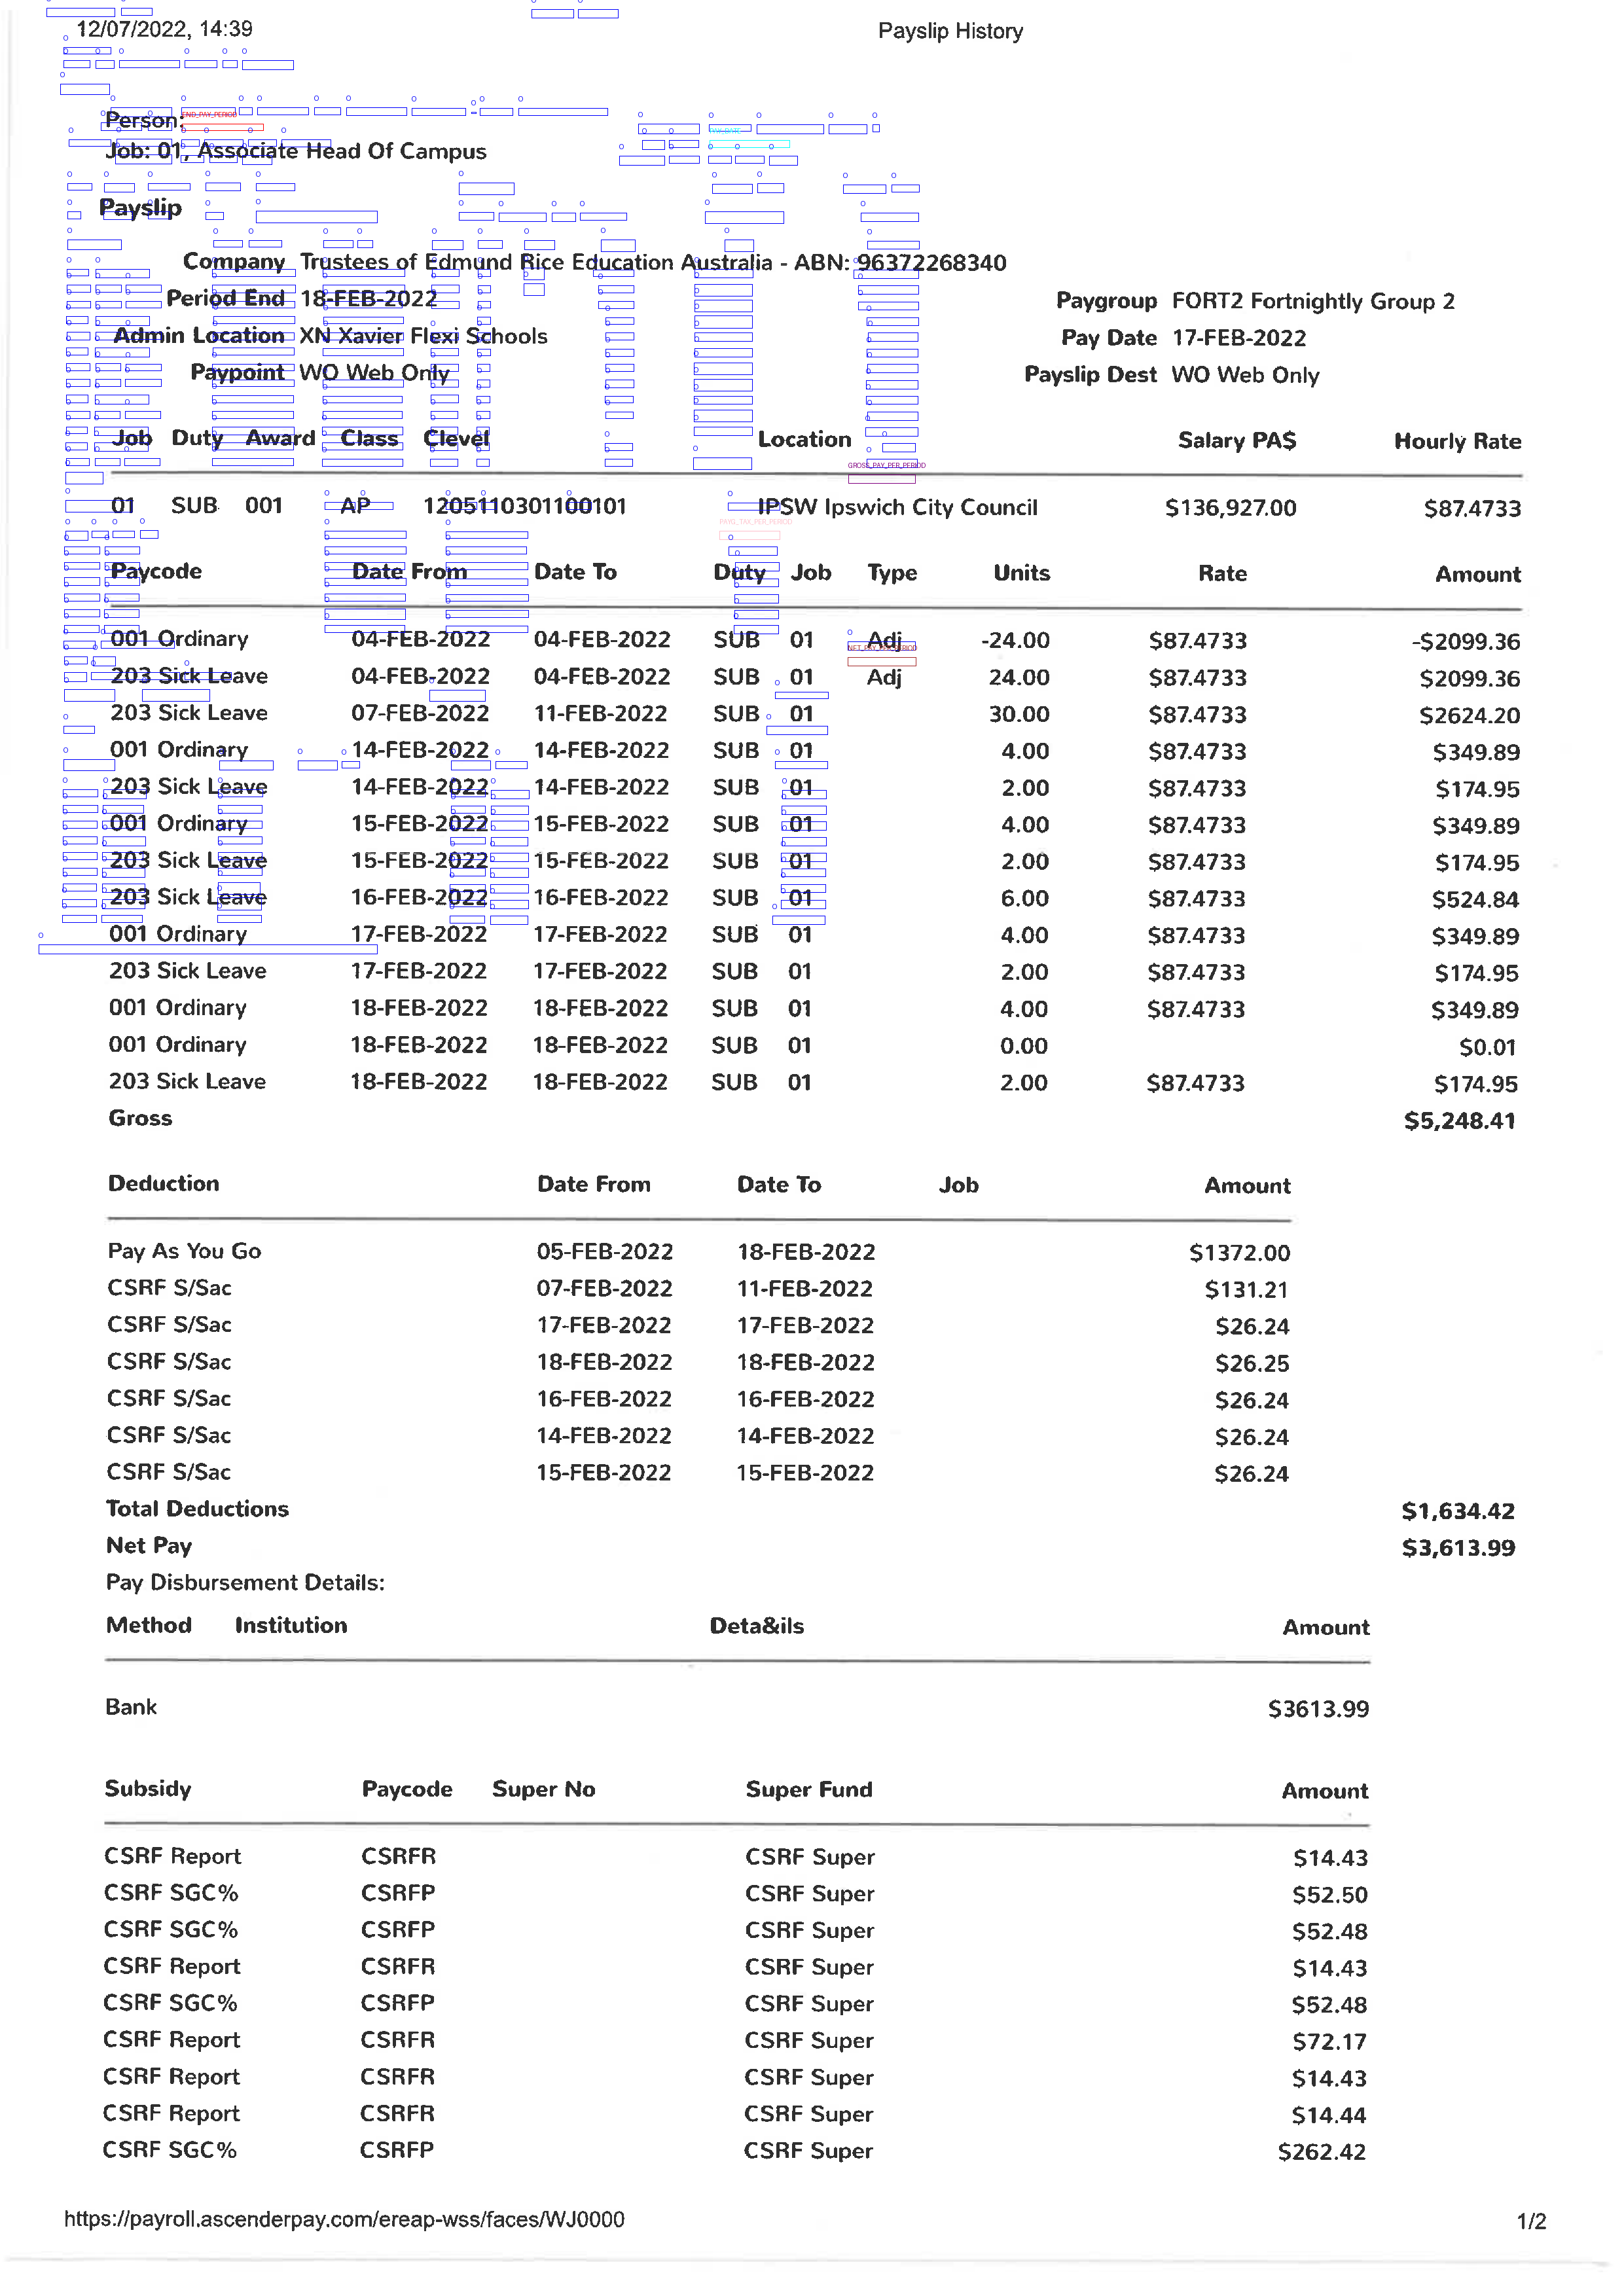

In [18]:
train_image_folder = os.path.join(data_dir, 'train', 'images')
# Assuming `train_examples` is a list of objects with the provided structure
# and `train_image_folder` is the path to the folder containing the images
ex = train_examples[np.random.randint(0, len(train_examples))]

# Load the image
image_path = os.path.join(train_image_folder, ex.file_name.replace('.json', '.png'))
image = Image.open(image_path)
draw = ImageDraw.Draw(image)

# Define a colormap for different colors for each label
colormap = {
    'O': 'blue',
    'BEGIN_PAY_PERIOD': 'green',
    'END_PAY_PERIOD': 'red',
    'GROSS_PAY_PER_PERIOD': 'purple',
    'GROSS_TAXABLE_PER_PERIOD': 'orange',
    'NET_PAY_PER_PERIOD': 'brown',
    'PAYG_TAX_PER_PERIOD': 'pink',
    'PAY_DATE': 'cyan',
    'POST_TAX_DEDUCTIONS_PER_PERIOD': 'yellow',
    'PRE_TAX_DEDUCTION_PER_PERIOD': 'lime',
}


# Plot bounding boxes and labels
for bbox, label in zip(ex.boxes, ex.labels):
    x, y, w, h = bbox
    draw.rectangle([x, y, w, h], outline=colormap[label])

    # Display label above the bounding box
    draw.text((x, y-20), label, fill=colormap[label], font=None, )

# Show the image in the notebook
display(image)

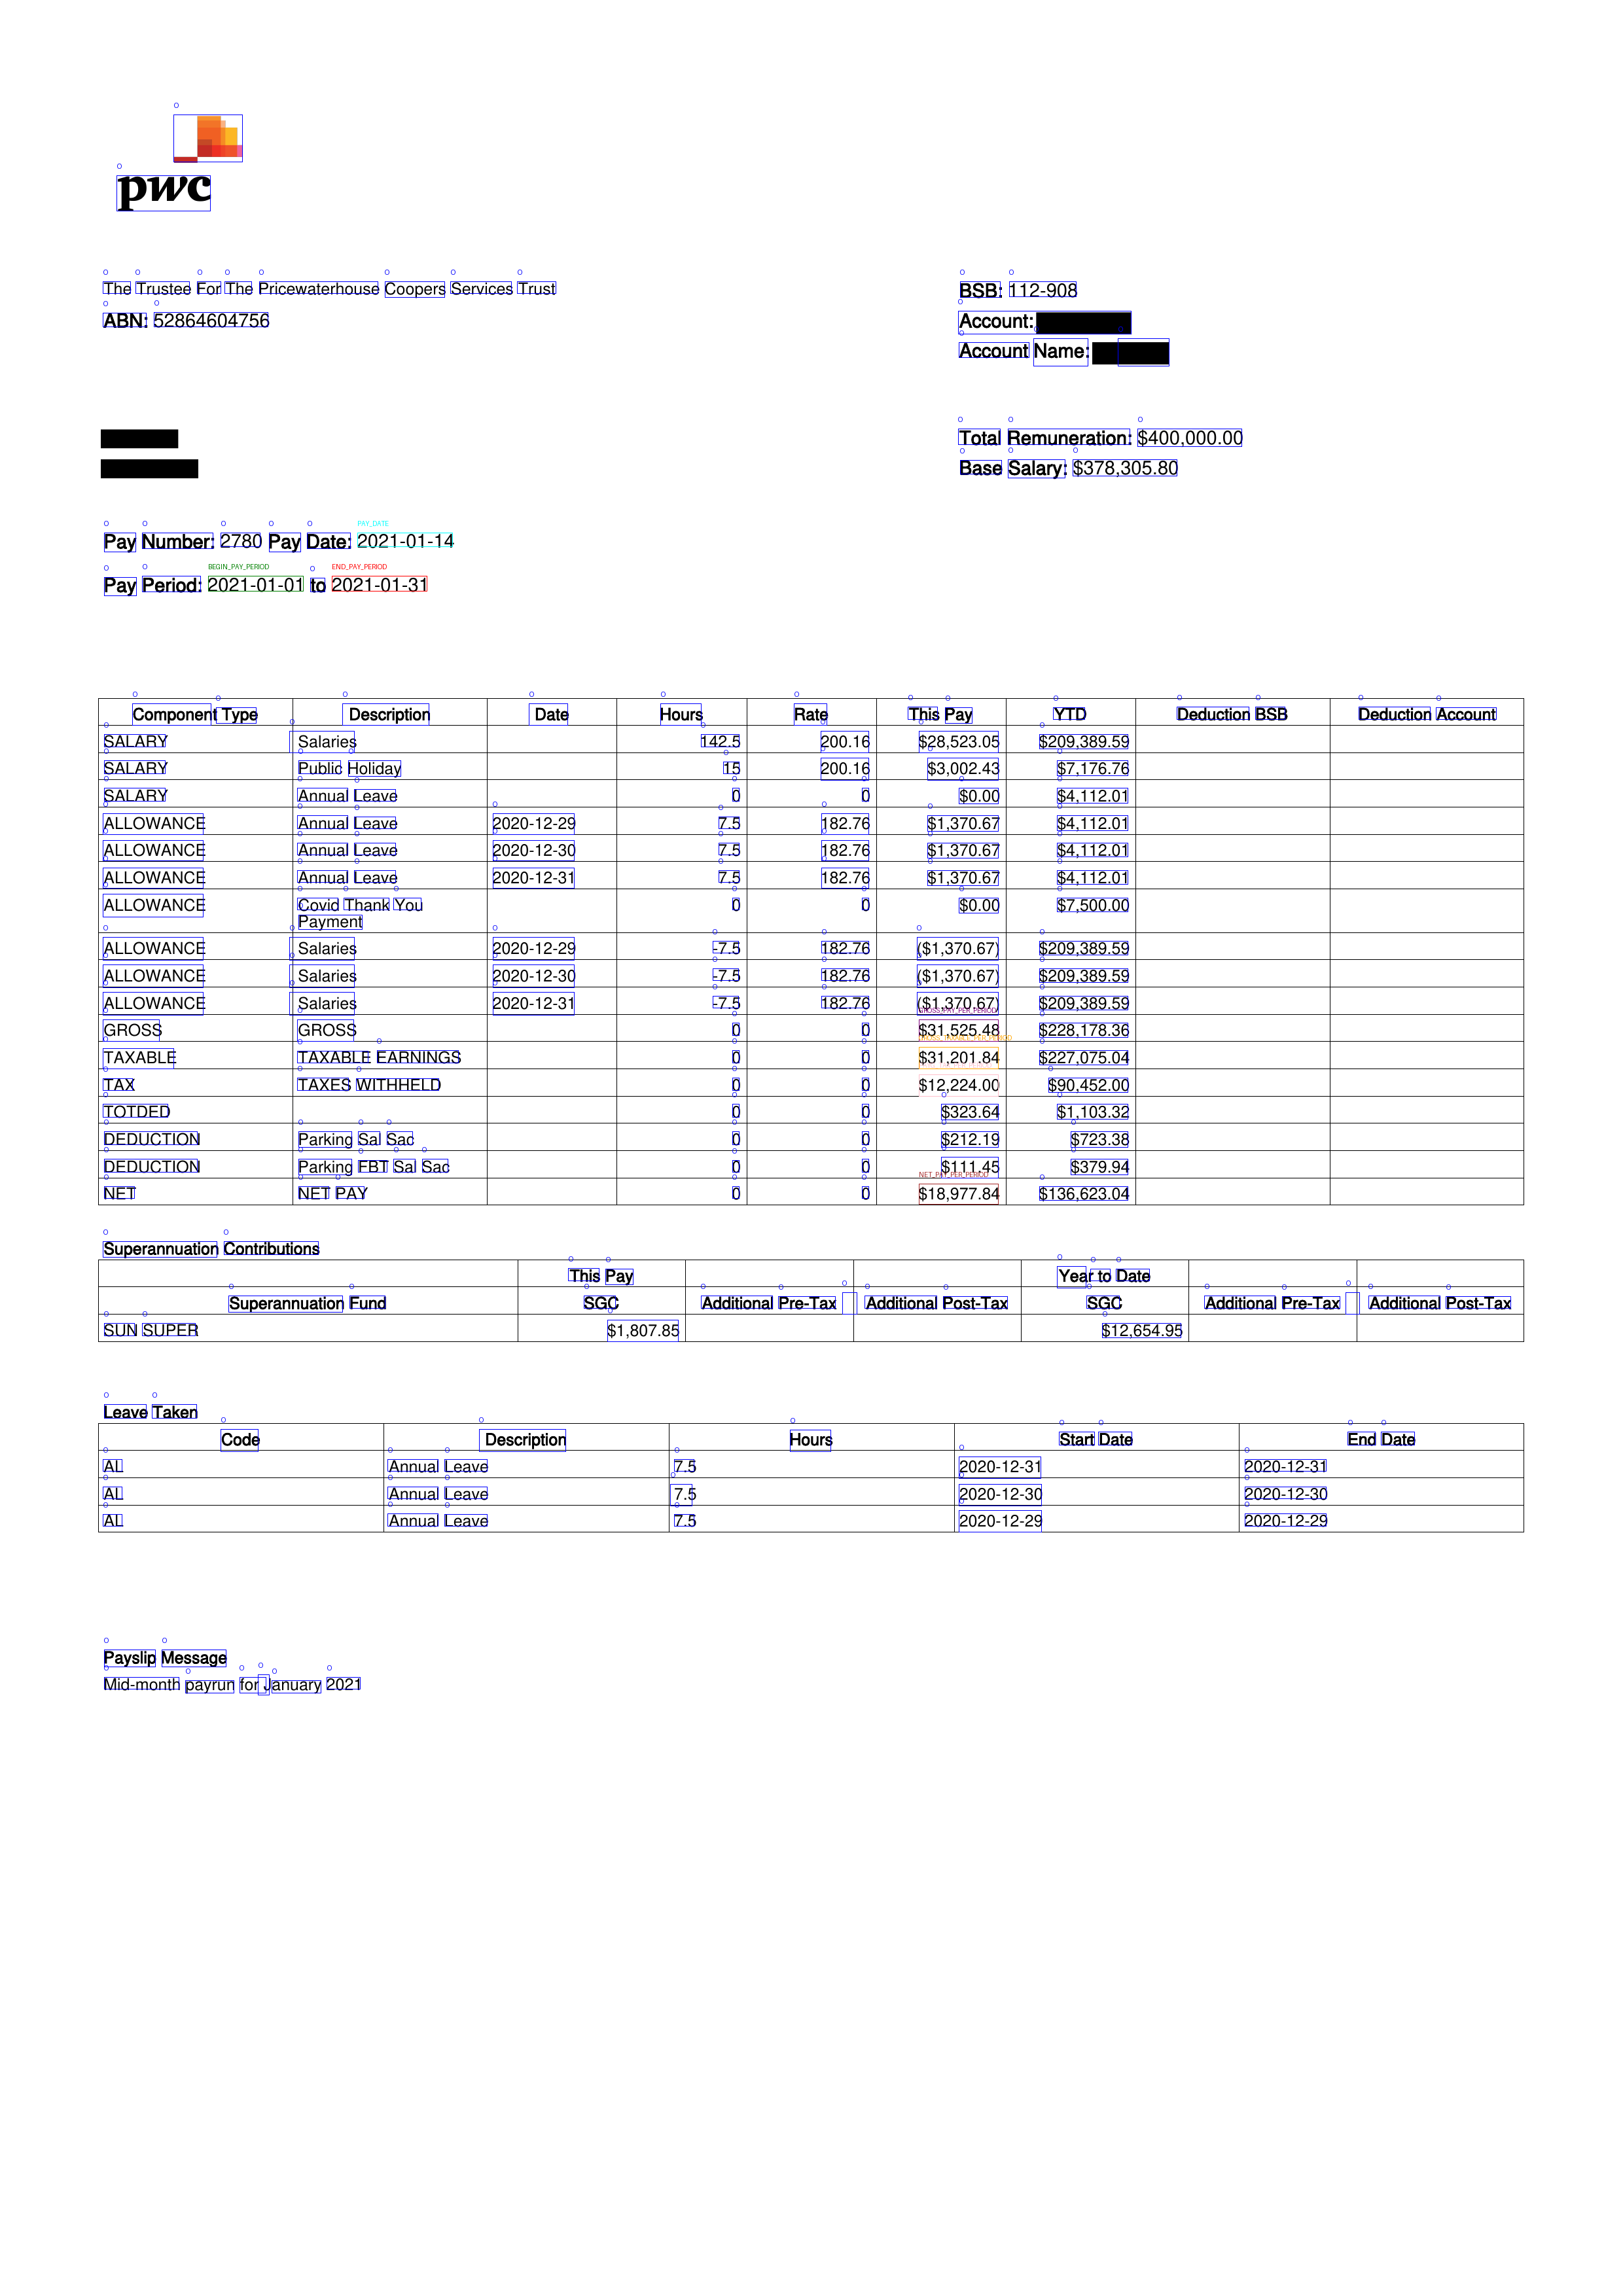

In [21]:
test_image_folder = os.path.join(data_dir, 'test', 'images')

# Assuming `test_examples` is a list of objects with the provided structure
# and `test_image_folder` is the path to the folder containing the images
ex = test_examples[np.random.randint(0, len(test_examples))]

# Load the image
image_path = os.path.join(test_image_folder, ex.file_name.replace('.json', '.png'))
image = Image.open(image_path)
draw = ImageDraw.Draw(image)

# Define a colormap for different colors for each label
colormap = {
    'O': 'blue',
    'BEGIN_PAY_PERIOD': 'green',
    'END_PAY_PERIOD': 'red',
    'GROSS_PAY_PER_PERIOD': 'purple',
    'GROSS_TAXABLE_PER_PERIOD': 'orange',
    'NET_PAY_PER_PERIOD': 'brown',
    'PAYG_TAX_PER_PERIOD': 'pink',
    'PAY_DATE': 'cyan',
    'POST_TAX_DEDUCTIONS_PER_PERIOD': 'yellow',
    'PRE_TAX_DEDUCTION_PER_PERIOD': 'lime',
}


# Plot bounding boxes and labels
for bbox, label in zip(ex.actual_bboxes, ex.labels):
    x, y, w, h = bbox
    draw.rectangle([x, y, w, h], outline=colormap[label])

    # Display label above the bounding box
    draw.text((x, y-20), label, fill=colormap[label], font=None, )

# Show the image in the notebook
display(image)